In [2]:
import pandas as pd
from pandas.errors import OutOfBoundsDatetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

from src.utils import read_jsonl, write_jsonl
from src.visualization.visualize import paper_mpl_env, title
import textwrap
import numpy as np
import os

%load_ext autoreload
%autoreload 2

## GPT-4 Scenarios

In [3]:
# Prompt asks for shorter summaries and simpler siuations
v2_data = pd.read_json('/gscratch/bdata/datasets/llms_and_timeseries/v2_MCQ.json',lines=True)

### Extract Categories

In [4]:
categories = pd.read_json("categorized_output.json",lines=True)[["uuid","category"]]
categories.rename(columns={"category":"scenario_category"}, inplace=True)
categories["scenario_category"] = categories["scenario_category"].str.split("Category:").str[-1].str.strip().str.removeprefix("'").str.removesuffix("'")

top_ten = categories["scenario_category"].value_counts().head(10).index.to_list()
categories = categories[categories["scenario_category"].isin(top_ten)]

categories.to_csv("data/processed/scenario_categories.csv",index=False)

In [5]:
categorised_data = v2_data.join(categories.set_index("uuid"),on="uuid", how="inner")
category_label_map = {
    "Environmental and Climate Data": "Environmental and Climate",
    "Agricultural and Food Production": "Agriculture and Food",
    "Wildlife and Nature Observation": "Wildlife and Nature",
    "Energy and Resource Consumption": "Energy and Resource Consumption",
    "Recreational and Entertainment Trends": "Entertainment",
    "Technology and Digital Trends": "Technology and Digital",
}
categorised_data["scenario_category"] = categorised_data["scenario_category"].map(lambda x: category_label_map.get(x,x))

Index(['description', 'description_short', 'description_tiny',
       'characteristics', 'generator', 'metadata', 'series', 'uuid',
       'category', 'question', 'options', 'answer_index', 'ts_qid'],
      dtype='object')

### Examples

In [6]:
shortened_description = "This scenario involves the monitoring of temperature in an agritech controlled environment where special hybrid crops are grown.  Let's say on the 3rd day, a power outage occurred, having an impact on the heating system, thus this event will influence an unusual decrease in the temperature."

In [7]:
one_of_each = categorised_data.groupby("scenario_category").last().reset_index()
one_of_each

,scenario_category,description,description_short,description_tiny,characteristics,generator,metadata,series,uuid,category,question,options,answer_index,ts_qid
0,Agriculture and Food,This scenario involves the monitoring of tempe...,Temperature monitoring of agritech controlled ...,Agritech temperature tracking,\n1. Regular fluctuations: The time series may...,\n```python\nimport numpy as np\nimport dateti...,"{'start': '2023-01-01 00:10:00', 'end': '2023-...","[71.49014245903369, 69.58520709648644, 71.9430...",42a0cde4-760d-48e1-bff5-ca8aee7f53c8,analogical,In a traffic analysis system the traffic volum...,[This scenario is akin to the Agritech tempera...,2,22
1,Educational and Public Services,A tech vlogging YouTube channel decides to cr...,A YouTube vlog's daily views increase upon in...,YouTube Python Tutorials,\n1. The time series will start with a base l...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2021-01-01', 'end': '2021-06-29', '...","[4999.118591427488, 5789.949387416356, 4775.20...",cdc0a622-e9d9-4509-bbba-455f2944c467,counterfactual,What would happen if the series does not gain ...,[If the series does not gain recognition and f...,2,21
2,Energy and Resource Consumption,The scenario involves monitoring the daily po...,Time series represents daily power consumptio...,Data center power usage.,\n- The data should show a general upward tren...,\n```python\nimport numpy as np\nimport pandas...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[54106.00574875912, 52899.13527134746, 45268.0...",b84bff83-b051-4d03-9f4c-bf1dc90a6b23,counterfactual,What if the data center decided not to use air...,[The power usage would fluctuate more during s...,2,22
3,Entertainment,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f251ec49f,counterfactual,What if the theater introduced a system allowi...,[The sharp drop in footfalls immediately follo...,3,19
4,Environmental and Climate,Consider a scenario of rainfall measuring age...,The time series represents the daily recorded...,Monsoon Rainfall Data,\n1. The time series starts with comparativel...,\n```python\nimport numpy as np\n\ndef genera...,"{'start': '2022-06-01', 'end': '2022-09-28', '...","[11.479306303449343, 6.181287824985414, 12.636...",db818787-5f91-437f-97d3-d84ece721f00,counterfactual,What if the postmonsoon period started with a ...,[If the postmonsoon period started with a sudd...,2,19
5,Health and Medical Data,\nA time series measuring daily steps of a fit...,\nTime series tracking daily steps of a person...,\nDaily Steps Tracking\n,\n1. We expect a sudden rise in steps at the b...,\n```python\nimport numpy as np\nimport pandas...,"{'start': '2022-01-01', 'end': '2022-12-31', '...","[6433.3420967409465, 6340.46854010765, 6042.67...",d364572b-439a-480f-8392-cb21321fe3e3,counterfactual,What would the timeseries look like if the per...,[The timeseries would show a sudden spike in t...,2,24
6,Sales and Market Trends,We track the daily coffee sales in a small ca...,Daily coffee sales in a café near a college o...,Coffee Sales Data,\n1. There would be a day of the week trend—sa...,\n```python\nimport numpy as np\nimport random...,"{'start': '2022-01-01', 'end': '2022-12-31', '...","[66.50449005295815, 55.41188917749494, 66.4459...",b1c845bc-ae6c-4830-86e7-12269ee8dc12,counterfactual,What would happen to the timeseries sales data...,[A significant increase in the price of coffee...,3,22
7,Technological and Digital Trends,This scenario tracks the daily followers coun...,Tracking daily follower counts of a rising In...,Instagram follower tracking,\n \n- The series will generally increa...,\n\n```python\nimport numpy as np\n\ndef gene...,"{'start': '2018-

07/25/2024 14:00:45 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:00:45 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:00:46 - INFO - fontTools.subset -   post pruned
07/25/2024 14:00:46 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:00:46 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:00:46 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:00:46 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:00:46 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:00:46 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:00:46 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 66 glyphs before
07/25/2024 14:00:46 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'comma', 'd', 'e', 'eacute', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'n

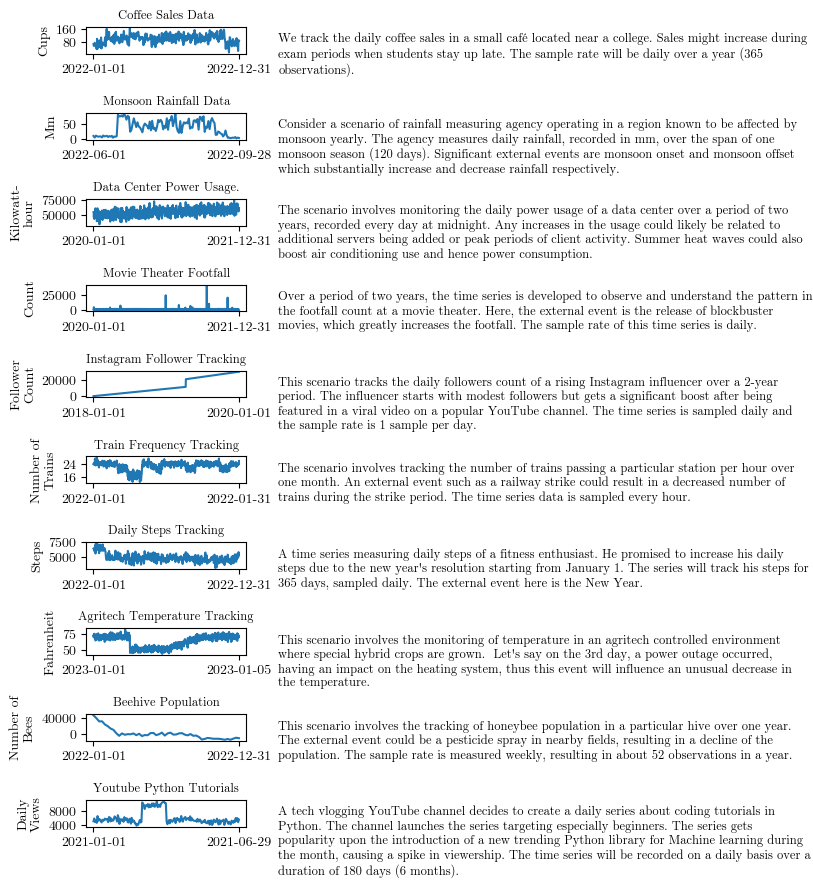

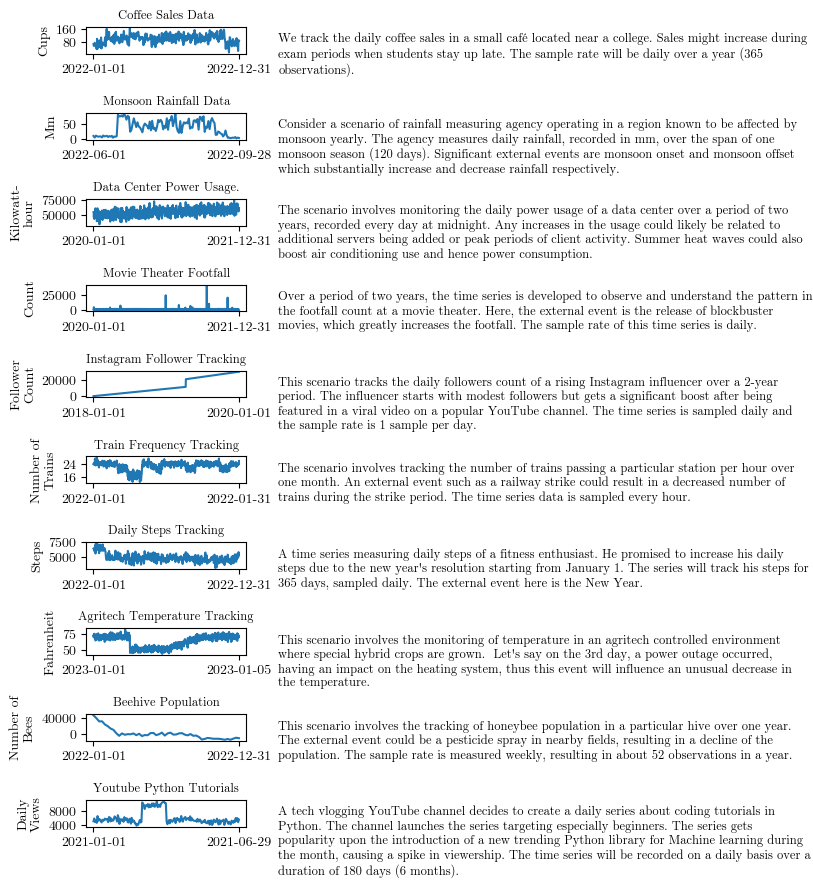

In [8]:
one_of_each = categorised_data.groupby("scenario_category").last().reset_index()
one_of_each.loc[one_of_each["scenario_category"]=="Agriculture and Food", "description"] = shortened_description
with paper_mpl_env():    
    fig1, axes = plt.subplots(10, 1, figsize=(8, 8))
    axes = axes.flatten()
    i=0
    i_start=0
    n_plotted = 0
    cat_counts = categorised_data['scenario_category'].value_counts().rename('counts')
    one_of_each = one_of_each.join(cat_counts, on='scenario_category')
    one_of_each.sort_values(by = "counts", ascending=False, inplace=True)
    
    cmap = iter(cm.tab10(np.linspace(0,1,10)))
    while n_plotted < 10:
        sample = one_of_each.iloc[i]
        ts = sample['series']
        desciption = sample['description']
        desciption_tiny = title(sample['description_tiny'])
        start = sample['metadata']['start']
        end = sample['metadata']['end']
        units = title(sample['metadata']['units'])
        category = ""
        color = None

        try:
            x = pd.date_range(start=start, end=end, periods=len(ts))
        except OutOfBoundsDatetime:
            x = range(len(ts))
            print("Warning: OutOfBoundsDatetime")
            i+=1
            continue
        

        axes[n_plotted].plot(x,ts, color=color)
        axes[n_plotted].set_title(desciption_tiny.strip(), fontsize=9)
        axes[n_plotted].text(1.2, 0.9, category, fontsize=9, transform=axes[n_plotted].transAxes, fontweight='bold', ha='left')
        # Put bold text that says "Description: above the description"
        # axes[n_plotted].text(1.1, 0.85, "Description:", fontsize=10, transform=axes[n_plotted].transAxes, fontweight='bold', ha='left')
        # Put description in box to the right of each subplot (with text wrapping)
        axes[n_plotted].text(1.2,0.8, desciption.strip(), wrap=True, fontsize=9, transform=axes[n_plotted].transAxes, va='top')
        # Set xticks to just first and last
        axes[n_plotted].set_xticks([x[0], x[-1]])
        # Set yticks to just first and last
        axes[n_plotted].yaxis.set_major_locator(plt.MaxNLocator(2))
        axes[n_plotted].set_ylabel(textwrap.fill(units,10))
        i += 1
        n_plotted += 1

    fig1.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.3, 
                    top=1.0, 
                    wspace=1.0, 
                    hspace=2.2)
    # fig1.tight_layoutb() 
    fig1.savefig("reports/2024/one_of_each.pdf",bbox_inches='tight')
fig1


### Export

In [15]:
categorised_data

,description,description_short,description_tiny,characteristics,generator,metadata,series,uuid,category,question,options,answer_index,ts_qid,scenario_category
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0,Agriculture and Food
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0,Agriculture and Food
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0,Energy and Resource Consumption
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0,Energy and Resource Consumption
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0,Energy and Resource Consumption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197291,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f251ec49f,description,How many days are included in the time series ...,[A time series of length 3650 days representin...,1,15,Entertainment
197292,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f251ec49f,counterfactual,What would happen to the timeseries if the the...,[The timeseries would show a decline in the lo...,2,16,Entertainment
197293,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a w

In [22]:
v2_data

,description,description_short,description_tiny,characteristics,generator,metadata,series,uuid,category,question,options,answer_index,ts_qid
0,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the lowest temperature recorded durin...,"[18.61 degrees, 20.52 degrees, 12.34 degrees, ...",0,0
1,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,What was the highest temperature recorded duri...,"[32.85 degrees, 28.19 degrees, 25.43 degrees, ...",3,1
2,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,Approximately how much did the temperature ris...,"[Approximately 5 degrees, Approximately 7 degr...",2,2
3,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,Following the restoration of power what temper...,"[Around 15 degrees, Around 22 degrees, Around ...",2,3
4,A scientist is measuring the temperature in a...,A temperature reading from an industrial free...,Freezer Temperature Time Series,\n1) Continuous increment of temperature duri...,\n```python\nimport numpy as np\ndef generate...,"{'start': '2022-03-01 00:00:00', 'end': '2022-...","[20.88202617298383, 20.200078604183613, 20.489...",f1e0cf26-8707-4e47-a64e-0a51c1867cc6,time-series,During the recovery period after the power out...,"[Approximately 5 degrees, Approximately 7 degr...",2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197291,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f251ec49f,description,How many days are included in the time series ...,[A time series of length 3650 days representin...,1,15
197292,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f251ec49f,counterfactual,What would happen to the timeseries if the the...,[The timeseries would show a decline in the lo...,2,16
197293,"\nOver a period of two years, the time series ...",\nThe time series examines the daily footfall ...,\nMovie theater footfall\n,\n1. The time series would typically show a we...,\n```python\nimport numpy as np\nimport panda...,"{'start': '2020-01-01', 'end': '2021-12-31', '...","[1041.2476339148154, 1765.7337117815525, 4652....",c557e137-9da2-4126-8826-906f25

0
1
2
3
4
5
6
7
8
9
10


07/25/2024 14:09:07 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:07 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:07 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:07 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:07 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 63 glyphs before
07/25/2024 14:09:07 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'K', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'j', 'k', 'l', 'm', 'n', 'nine', 'o', 'one', 'p', 'p

11
12
13
14
15
16
17
18
19
20


07/25/2024 14:09:08 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:08 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:08 - INFO - fontTools.subset -   Missing glyphs for requested Unicodes: ['U+2212']
07/25/2024 14:09:08 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:08 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:08 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 65 glyphs before
07/25/2024 14:09:08 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'V', 'W', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f'

21
22
23
24
25
26
27
28
29
30


07/25/2024 14:09:10 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:10 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:10 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:10 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:10 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 68 glyphs before
07/25/2024 14:09:10 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'a', 'b', 'c', 'comma', 'd', 'degree', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'j', 'k', 'l', 'm', 'n', 'n

31
32
33
34
35
36
37
38
39
40


07/25/2024 14:09:13 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:13 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:13 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:13 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:13 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 64 glyphs before
07/25/2024 14:09:13 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'V', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'one', 'p', 'pare

41
42
43
44
45
46
47
48
49
50


07/25/2024 14:09:15 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:15 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:15 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:15 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:15 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 69 glyphs before
07/25/2024 14:09:15 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'a', 'b', 'c', 'colon', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'j', 'k', 'l', 'm', 'n'

51
52
53
54
55
56
57
58
59
60


07/25/2024 14:09:16 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:16 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:16 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:16 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:16 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 64 glyphs before
07/25/2024 14:09:16 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'V', 'W', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'j', 'k', 'l', 'm', 'n', 'nine', 'o', 'one

61
62
63
64
65
66
67
68
69
70


07/25/2024 14:09:18 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:18 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:18 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:18 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:18 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 68 glyphs before
07/25/2024 14:09:18 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'asciicircum', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n

71
72
73
74
75
76
77
78
79
80


07/25/2024 14:09:19 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:19 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:19 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:19 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:19 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 67 glyphs before
07/25/2024 14:09:19 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'Y', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine',

81
82
83
84
85
86
87
88
89
90


07/25/2024 14:09:21 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:21 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:21 - INFO - fontTools.subset -   Missing glyphs for requested Unicodes: ['U+2212']
07/25/2024 14:09:21 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:21 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:21 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 69 glyphs before
07/25/2024 14:09:21 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'W', 'Y', 'a', 'b', 'c', 'comma', 'd', 'd

91
92
93
94
95
96
97
98
99
100


07/25/2024 14:09:22 - INFO - fontTools.subset -   maxp pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   cmap pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   post pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   FFTM dropped
07/25/2024 14:09:22 - INFO - fontTools.subset -   GPOS pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   GSUB pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   glyf pruned
07/25/2024 14:09:22 - INFO - fontTools.subset -   Added gid0 to subset
07/25/2024 14:09:22 - INFO - fontTools.subset -   Added first four glyphs to subset
07/25/2024 14:09:22 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 64 glyphs before
07/25/2024 14:09:22 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'a', 'b', 'c', 'comma', 'd', 'e', 'eacute', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'o',

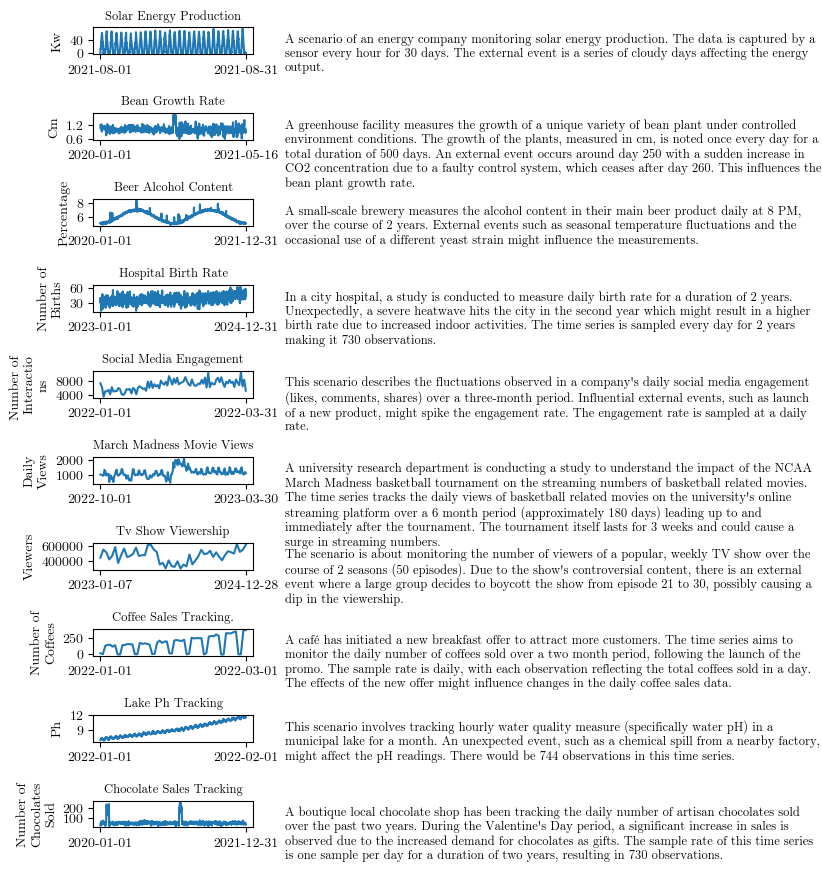

In [23]:
scenarios = v2_data.drop_duplicates("description")
with paper_mpl_env(): 
    i = 0
    i_start=0
    j = 0
    while j <10:
        
        n_plotted = 0
        fig1, axes = plt.subplots(10, 1, figsize=(8, 8))
        axes = axes.flatten()
        
        # cat_counts = categorised_data['scenario_category'].value_counts().rename('counts')
        # one_of_each = one_of_each.join(cat_counts, on='scenario_category')
        # one_of_each.sort_values(by = "counts", ascending=False, inplace=True)
        
        cmap = iter(cm.tab10(np.linspace(0,1,10)))
        while n_plotted  < 10:
            print(i)
            sample = scenarios.iloc[i]
            ts = sample['series']
            desciption = sample['description']
            desciption_tiny = title(sample['description_tiny'])
            start = sample['metadata']['start']
            end = sample['metadata']['end']
            units = title(sample['metadata']['units'])
            category = ""
            color = None

            try:
                x = pd.date_range(start=start, end=end, periods=len(ts))
            except OutOfBoundsDatetime:
                x = range(len(ts))
                print("Warning: OutOfBoundsDatetime")
                i+=1
                continue
            
            
            axes[n_plotted].plot(x,ts, color=color)
            axes[n_plotted].set_title(desciption_tiny.strip(), fontsize=9)
            axes[n_plotted].text(1.2, 0.9, category, fontsize=9, transform=axes[n_plotted].transAxes, fontweight='bold', ha='left')
            # Put bold text that says "Description: above the description"
            # axes[n_plotted].text(1.1, 0.85, "Description:", fontsize=10, transform=axes[n_plotted].transAxes, fontweight='bold', ha='left')
            # Put description in box to the right of each subplot (with text wrapping)
            axes[n_plotted].text(1.2,0.8, desciption.strip(), wrap=True, fontsize=9, transform=axes[n_plotted].transAxes, va='top')
            # Set xticks to just first and last
            axes[n_plotted].set_xticks([x[0], x[-1]])
            # Set yticks to just first and last
            axes[n_plotted].yaxis.set_major_locator(plt.MaxNLocator(2))
            axes[n_plotted].set_ylabel(textwrap.fill(units,10))
            i += 1
            n_plotted += 1

        fig1.subplots_adjust(left=0.1,
                        bottom=0, 
                        right=0.3, 
                        top=1.0, 
                        wspace=1.0, 
                        hspace=2.2)
        # fig1.tight_layoutb() 
        fig1.savefig(f"reports/emnlp_reviewers/{j}.pdf",bbox_inches='tight')
        j +=1
fig1

### Donut Plot

03/29/2024 11:41:38 - INFO - fontTools.subset -   maxp pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   cmap pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   post pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   FFTM dropped
03/29/2024 11:41:38 - INFO - fontTools.subset -   GPOS pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   GSUB pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   glyf pruned
03/29/2024 11:41:38 - INFO - fontTools.subset -   Added gid0 to subset
03/29/2024 11:41:38 - INFO - fontTools.subset -   Added first four glyphs to subset
03/29/2024 11:41:38 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 50 glyphs before
03/29/2024 11:41:38 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'A', 'C', 'D', 'E', 'F', 'H', 'M', 'N', 'P', 'R', 'S', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'glyph1', 'h', 'i', 'k', 'l', 'm', 'n', 'nine', 'o', 'one', 'p', 'percent', 'period', 'r', 's', 'seven', 'six',

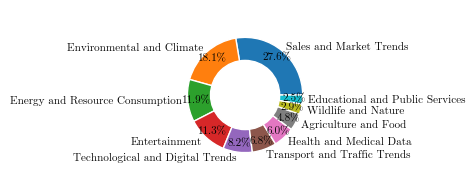

In [8]:

with paper_mpl_env():
    fig2, ax = plt.subplots(figsize=(3.5, 2))
    category_portions = categorised_data["scenario_category"].value_counts(normalize=True)

    category_portions.index   = category_portions.index.map(lambda x: category_label_map.get(x, x))
    plt.pie(category_portions, labels=category_portions.index, autopct='%1.1f%%', startangle=0, 
            wedgeprops={'edgecolor': 'white', 'linewidth': 1},
            textprops={'fontsize': 8},
            pctdistance=0.85)
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.6, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    plt.tight_layout()
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    # plt.title('Scenario Category Portion', fontsize=14, fontweight='bold')
    plt.savefig("reports/2024/category_portion.pdf", bbox_inches='tight')
fig2

### Analysis of generated scenarios:

03/29/2024 11:41:43 - INFO - fontTools.subset -   maxp pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   cmap pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   post pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   FFTM dropped
03/29/2024 11:41:43 - INFO - fontTools.subset -   GPOS pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   GSUB pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   glyf pruned
03/29/2024 11:41:43 - INFO - fontTools.subset -   Added gid0 to subset
03/29/2024 11:41:43 - INFO - fontTools.subset -   Added first four glyphs to subset
03/29/2024 11:41:43 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 34 glyphs before
03/29/2024 11:41:43 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'C', 'F', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'g', 'glyph1', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'space', 't', 'two', 'u', 'underscore', 'uni000D', 'w', 'x', 'y', 'z', 'zero']
03/29/2024 11:41:43 - INFO - fontTools.

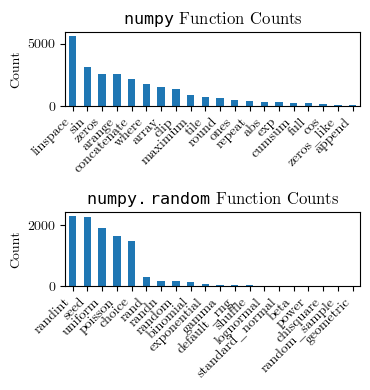

In [9]:
import ast
import pandas as pd
import collections
from typing import List, Set

scenarios = pd.read_json("data/processed/ts2desc/v2.jsonl", lines=True)
def is_numpy_function_call(node):
    """
    Check if the AST node represents a NumPy function call.
    """
    return isinstance(node, ast.Call) and hasattr(node.func, 'value') and isinstance(node.func.value, ast.Name) and node.func.value.id == 'np'

def is_numpy_random_function_call(node):
    """
    Check if the AST node represents a NumPy random module function call.
    """
    return (isinstance(node, ast.Call) and hasattr(node.func, 'value') and
            isinstance(node.func.value, ast.Attribute) and
            node.func.value.attr == 'random' and
            isinstance(node.func.value.value, ast.Name) and
            node.func.value.value.id == 'np')


def count_numpy_functions(snippets: List[str], random_only: bool = False):
    """
    Count the uses of each NumPy function in a list of Python snippets.
    """
    counts = collections.Counter()

    if random_only:
        filter_fn = is_numpy_random_function_call
    else:
        filter_fn = is_numpy_function_call

    for snippet in snippets:
        # Parse the snippet into an AST
        snippet = snippet.replace("```python", "").replace("```", "")
        tree = ast.parse(snippet)

        # Find all function calls
        function_calls = [node for node in ast.walk(tree) if filter_fn(node)]

        # Count each NumPy function
        for func in function_calls:
            func_name = func.func.attr
            counts[func_name] += 1

    return counts



all_counts = count_numpy_functions(scenarios["generator"])
all_counts_df = pd.DataFrame.from_dict(all_counts, orient='index', columns=['Count'])
all_counts_df.sort_values(by='Count', ascending=False, inplace=True)
all_counts_df = all_counts_df.iloc[:20]

random_counts = count_numpy_functions(scenarios["generator"], random_only=True)
random_counts_df = pd.DataFrame.from_dict(random_counts, orient='index', columns=['Count'])
random_counts_df.sort_values(by='Count', ascending=False, inplace=True)
random_counts_df = random_counts_df.iloc[1:21]


with paper_mpl_env():
    fig, axes = plt.subplots(2,1,figsize=(3.8, 4))

    all_counts_df.plot(kind='bar', ax=axes[0])
    axes[0].set_xticklabels(all_counts_df.index, rotation=45, ha='right')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Count')
    axes[0].set_title('$\mathtt{numpy}$ Function Counts')
    axes[0].legend().set_visible(False)

    random_counts_df.plot(kind='bar', ax=axes[1])
    axes[1].set_xticklabels(random_counts_df.index, rotation=45, ha='right')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Count')
    axes[1].set_title('$\mathtt{numpy.random}$ Function Counts')
    axes[1].legend().set_visible(False)

    plt.tight_layout()
    fig.savefig("reports/2024/numpy_function_counts.pdf", bbox_inches='tight')
fig


### Other analysis of dataset:

In [27]:
units = scenarios["metadata"].map(lambda x: x["units"]).rename("Units")\
        .str.upper()\
        .str.replace("NUMBER OF ", "")\
        .value_counts().rename("Count")\
        .to_frame()
units


,Count
Units,
KWH,377
VISITORS,318
DEGREES CELSIUS,243
LITERS,194
USD,177
...,...
WEBSITE HIT COUNTS,1
RECOVERY SPEED (UNIT/DAY),1
% SOIL MOISTURE,1


### Comparison of generation styles

In [ ]:
# Select the description that was also passed to gpt-4
print(v2_data[v2_data["description"].str.contains("daily productivity in terms of tasks completed")]["characteristics"].iloc[0])


1. Overall, there may be a positive trend in productivity as the employee gains more experience and skill.
2. Decreased productivity might be detected during weekends when the employee is not working.
3. Potential seasonal patterns could be identified, such as slowdowns during periods of leave/vacation or around public holidays.
4. Annual holiday season (November-December) is expected to lead to a dip in productivity.
5. The post-holiday period in January might show an increase in productivity as the employee returns fully engaged.



01/08/2024 13:35:10 - INFO - fontTools.subset -   maxp pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   cmap pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   post pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   FFTM dropped
01/08/2024 13:35:10 - INFO - fontTools.subset -   GPOS pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   GSUB pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   glyf pruned
01/08/2024 13:35:10 - INFO - fontTools.subset -   Added gid0 to subset
01/08/2024 13:35:10 - INFO - fontTools.subset -   Added first four glyphs to subset
01/08/2024 13:35:10 - INFO - fontTools.subset -   Closing glyph list over 'GSUB': 16 glyphs before
01/08/2024 13:35:10 - INFO - fontTools.subset -   Glyph names: ['.notdef', 'C', 'a', 'c', 'e', 'glyph1', 'h', 'i', 'n', 'o', 'p', 'r', 's', 'space', 't', 'uni000D']
01/08/2024 13:35:10 - INFO - fontTools.subset -   Glyph IDs:   [0, 1, 2, 3, 38, 68, 70, 72, 75, 76, 81, 82, 83, 85, 86, 87]
01/08/2024 13:35:10 - 

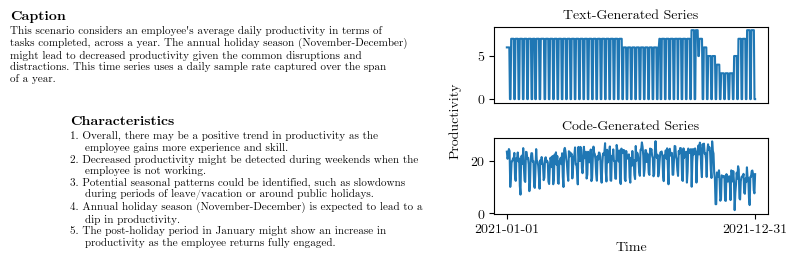

In [ ]:
example = v2_data[v2_data["description"].str.contains("daily productivity in terms of tasks completed")].iloc[0]
code_generated_series = example["series"]
metadata = example["metadata"]
start = metadata["start"]
end = metadata["end"]

text_generated_series = productivity = [
    # January (starting from post-holiday engagement)
    6, 6, 6, 6, 6, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7,
    # February (the skill is growing, small increments)
    7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7,   
    # March (increment in average productivity)
    7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0,
    # April
    7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7,
    # May (continuing the growth trend)
    7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0,
    # June
    0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7,
    # July (entering vacation period, small dip)
    7, 7, 7, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0,
    # August (vacation effect lingers)
    0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 0, 6, 6,
    # September (productivity is recovering)
    7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7,
    # October (full recovery and growth)
    0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8,
    # November (beginning of holiday decline)
    8, 5, 5, 7, 7, 7, 7, 7, 0, 0, 6, 6, 6, 6, 6, 0, 0, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 0,
    # December (lowest productivity period)
    4, 4, 4, 4, 4, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 5, 5, 5, 5,
    # January (post-holiday surge)
    5, 0, 0, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0, 0, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 0, 0
]

with paper_mpl_env():
    # Plotting the text generated series
    
    
    fig3, axes3 = plt.subplots(2,1,figsize=(4, 3))
    plt.cla()
    axes3 = axes3.flatten()

    x = pd.date_range(start=start, end=end, periods=len(text_generated_series))
    axes3[0].plot(x,text_generated_series)
    axes3[0].set_title('Text-Generated Series', fontsize=10)
    axes3[0].set_xlabel('')
    axes3[0].set_ylabel('')
    axes3[0].set_xticks([])


    # Plotting the code generated series
    x = pd.date_range(start=start, end=end, periods=len(code_generated_series))
    axes3[1].plot(x,code_generated_series)
    axes3[1].set_title('Code-Generated Series', fontsize=10)
    axes3[1].set_xlabel('Time')
    axes3[1].set_ylabel('')
    axes3[1].set_xticks([x[0], x[-1]])

    fig3.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    # plt.xlabel("common X")
    plt.ylabel("Productivity")
    

    TEXT_WIDTH=80
    PAD_SPACES = 4
    
    desciption = example['description']
    fig3.text(-1, 0.90, "Caption", fontsize=10,  fontweight='bold', ha='left')
    fig3.text(-1, 0.88, textwrap.fill(desciption.strip(),TEXT_WIDTH), fontsize=8, ha='left', va = "top")
    fig3.text(-.85, 0.55, "Characteristics", fontsize=10,  fontweight='bold', ha='left')

    numbered_characteristics = example["characteristics"].strip().split("\n")
    wrapped = [textwrap.wrap(c,70) for c in numbered_characteristics]
    padded = ["\n".join([cc if not i else " "*PAD_SPACES+cc for i, cc in enumerate(c) ]) for c in wrapped]
    characteristics = "\n".join(padded)
    fig3.text(-.85, 0.53, characteristics, fontsize=8, ha='left', va = "top")


    # # Adjusting the layout
    plt.tight_layout()
    fig3.savefig("reports/2024/text_vs_code.pdf", bbox_inches='tight')
fig3

### Split QA Pairs

In [ ]:
categories["scenario_category"].value_counts().head(10).index.to_list()

['Sales and Market Trends',
 'Environmental and Climate Data',
 'Energy and Resource Consumption',
 'Recreational and Entertainment Trends',
 'Technological and Digital Trends',
 'Transport and Traffic Trends',
 'Health and Medical Data',
 'Agricultural and Food Production',
 'Wildlife and Nature Observation',
 'Educational and Public Services']

In [ ]:
TRAIN_CATEGORIES = [
 'Sales and Market Trends',
 'Wildlife and Nature Observation',
 'Environmental and Climate Data',
 'Energy and Resource Consumption',
 'Technological and Digital Trends',
 'Recreational and Entertainment Trends',
 'Transport and Traffic Trends']

TEST_CATEGORIES = ['Health and Medical Data',
 'Agricultural and Food Production',
 'Educational and Public Services'
]

In [ ]:
def generated_series_okay(series):
    if isinstance(series, list):
        series = np.array(series)
    if not isinstance(series, np.ndarray):
        return False
    if series.ndim != 1:
        return False
    if len(series) > 1500 or len(series)<10:
        return False
    if not np.issubdtype(series.dtype, np.number):
        return False
    if np.isnan(series).any():
        return False
    if np.isinf(series).any():
        return False
    if np.iscomplex(series).any():
        return False
    if np.max(series) > 1e9:
        return False

    return True


categorised_data["series_okay"] = categorised_data["series"].apply(generated_series_okay)
categorised_data = categorised_data[categorised_data["series_okay"]]

In [ ]:
# Split into train test val, save 1000 examples from train for validation
train = categorised_data[categorised_data["scenario_category"].isin(TRAIN_CATEGORIES)].sample(frac=1, random_state=42)
val = train.sample(n=1000, random_state=42)
train = train.drop(val.index)
test = categorised_data[categorised_data["scenario_category"].isin(TEST_CATEGORIES)]

train.to_json("data/processed/QA/train.json",index=False, lines=True, orient="records")
val.to_json("data/processed/QA/val.json",index=False, lines=True, orient="records")
test.to_json("data/processed/QA/test.json",index=False, lines=True, orient="records")

## Spliting Descriptions by Category

In [ ]:
desciptions = pd.read_json("data/processed/ts2desc/v2.jsonl",lines=True)
desciptions = desciptions.join(categories.set_index("uuid"),on="uuid", how="inner")

train_desc = desciptions[desciptions["scenario_category"].isin(TRAIN_CATEGORIES)].sample(frac=1, random_state=42)
val_desc = train_desc.sample(n=1000, random_state=42)
test_desc = desciptions[desciptions["scenario_category"].isin(TEST_CATEGORIES)]

train_desc.to_json("data/processed/ts2desc/train.json",index=False, lines=True, orient="records")
val_desc.to_json("data/processed/ts2desc/val.json",index=False, lines=True, orient="records")
test_desc.to_json("data/processed/ts2desc/test.json",index=False, lines=True, orient="records")